In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

In [16]:
# Lista de archivos NIfTI
file = "./BrainAgeNeXt/lrp_mean_JUK.nii.gz"


In [17]:
"""img = nib.load(file)
data = img.get_fdata()
    
# Normalizar por el valor absoluto máximo
max_abs_value = np.max(np.abs(data))

print(f"Max absolute value in {file}: {max_abs_value}")

normalized_data = data / max_abs_value
   
perc_clip = 99  # Percentil para clipping
# Clipping simétrico para mejorar contraste
vmax = np.percentile(np.abs(normalized_data), perc_clip)
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

# Voxel más representativo
idx_max = np.unravel_index(np.argmax(np.abs(normalized_data)), normalized_data.shape)
print(f"Index of max relevance in {file}: {idx_max}")

# Slices rotados 180°
slices = [
np.fliplr(np.rot90(normalized_data[idx_max[0], :, :], k=3)),  # Sagittal
np.rot90(normalized_data[:, idx_max[1], :], k=3),  # Coronal
np.rot90(normalized_data[:, :, idx_max[2]], k=3)   # Axial
]

fig, axes = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1, 1, 0.05]})
views = ['Sagittal View', 'Coronal View', 'Axial View']

cmap = plt.cm.seismic
im = None

for ax, slc, view in zip(axes[:3], slices, views):
    im = ax.imshow(slc, cmap=cmap, norm=norm, origin='lower')
    ax.set_title(view, fontsize=16)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_aspect('equal')

fig.suptitle('Average LRP Relevance Map UNSAM_LC', fontsize=20, x=0.47)
cbar = plt.colorbar(im, cax=axes[3])
cbar.set_label('Relevance', rotation=270, labelpad=15,fontsize=16)

# Ajustar sin deformar
fig.subplots_adjust(wspace=0.2)
#plt.savefig(out_path, bbox_inches='tight', dpi=300)
plt.show(fig)
plt.close(fig)
"""

'img = nib.load(file)\ndata = img.get_fdata()\n    \n# Normalizar por el valor absoluto máximo\nmax_abs_value = np.max(np.abs(data))\n\nprint(f"Max absolute value in {file}: {max_abs_value}")\n\nnormalized_data = data / max_abs_value\n   \nperc_clip = 99  # Percentil para clipping\n# Clipping simétrico para mejorar contraste\nvmax = np.percentile(np.abs(normalized_data), perc_clip)\nnorm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)\n\n# Voxel más representativo\nidx_max = np.unravel_index(np.argmax(np.abs(normalized_data)), normalized_data.shape)\nprint(f"Index of max relevance in {file}: {idx_max}")\n\n# Slices rotados 180°\nslices = [\nnp.fliplr(np.rot90(normalized_data[idx_max[0], :, :], k=3)),  # Sagittal\nnp.rot90(normalized_data[:, idx_max[1], :], k=3),  # Coronal\nnp.rot90(normalized_data[:, :, idx_max[2]], k=3)   # Axial\n]\n\nfig, axes = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw={\'width_ratios\': [1, 1, 1, 0.05]})\nviews = [\'Sagittal View\', \'Coronal View\', \'Axi

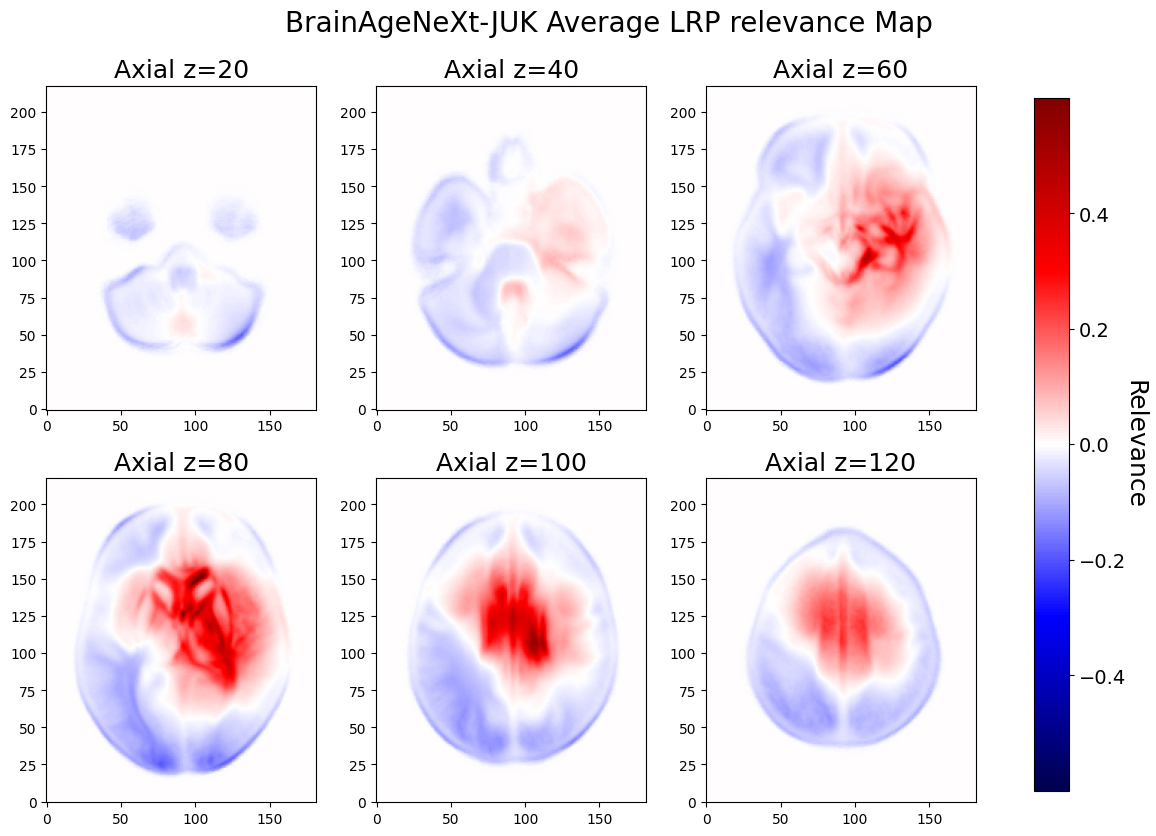

In [18]:
img = nib.load(file)
data = img.get_fdata()

# Normalizar por el valor absoluto máximo

max_abs_value = 10552 #np.max(np.abs(data))

normalized_data = data / max_abs_value

#perc_clip = 99
#vmax = np.percentile(np.abs(normalized_data), perc_clip)
vmax=0.6
vmin=-0.6
norm =TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

#############################
# NUEVA PARTE: AXIALES CADA 10 VOXELES
#############################

z_dim = normalized_data.shape[2]

step = 20
axial_indices = list(range(20, z_dim, step))

# Mantener exactamente 20 subplots → 4×5
axial_indices = axial_indices[:6]

# Obtener slices
axial_slices = [
    np.rot90(normalized_data[:, :, z], k=3)
    for z in axial_indices
]

#############################

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

cmap = plt.cm.seismic

# Aplanar axes para iterar
axes = axes.ravel()

for ax_i, ax in enumerate(axes):

    if ax_i < len(axial_slices):
        slc = axial_slices[ax_i]
        z = axial_indices[ax_i]

        im = ax.imshow(slc, cmap=cmap, norm=norm, origin='lower')
        ax.set_title(f'Axial z={z}', fontsize=18)
        ax.set_aspect('equal')

    else:
        # Subplot vacío si hay menos de 20 cortes
        ax.axis('off')

fig.suptitle('BrainAgeNeXt-JUK Average LRP relevance Map', fontsize=20, y=0.93)

# Ajuste
fig.subplots_adjust(wspace=0.22, hspace=0.04)

# Colorbar general
cbar = fig.colorbar(im, ax=axes.tolist(), shrink=0.9)
cbar.set_label('Relevance', rotation=270, labelpad=15, fontsize=18)
cbar.ax.tick_params(labelsize=14)

plt.show()
plt.close(fig)


In [24]:
file = "./Pyment/JUK_mean_LRP.nii.gz"
img = nib.load(file)
data = img.get_fdata()

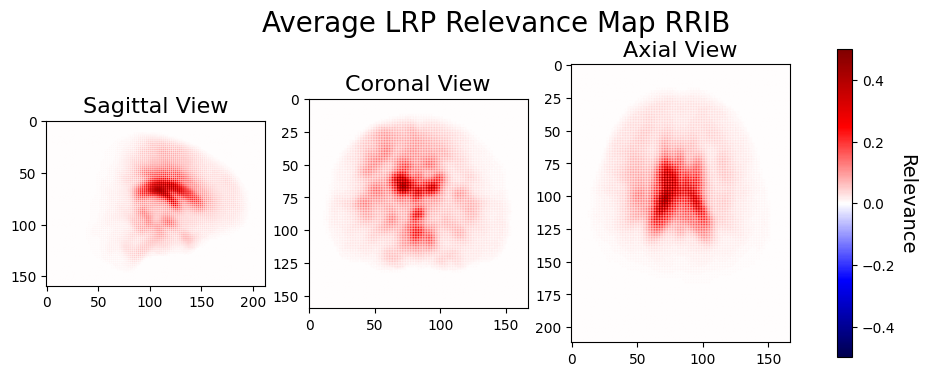

Coordenadas del voxel más representativo: (Height: 71, Width: 109, Depth: 93)


In [252]:
"""
# Graficar el promedio de las explicaciones
height, width, depth = np.unravel_index(np.argmax(np.abs(data)), data.shape)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Average LRP Relevance Map RRIB', fontsize=20)

# Sagittal View → fijamos eje X en "height"
im0 = ax[0].imshow(np.rot90(data[height, :, :]), cmap='seismic', clim=(-0.5, 0.5))
ax[0].set_title('Sagittal View',fontsize=16)

# Coronal View → fijamos eje Y en "width"
im1 = ax[1].imshow(np.rot90(data[:, width, :]), cmap='seismic', clim=(-0.5, 0.5))
ax[1].set_title('Coronal View',fontsize=16)

# Axial View → fijamos eje Z en "depth"
im2 = ax[2].imshow(np.rot90(data[:, :, depth]), cmap='seismic', clim=(-0.5, 0.5))
ax[2].set_title('Axial View',fontsize=16)

# Agregar un mapa de intensidad (colorbar)
cbar = fig.colorbar(im2, ax=ax, orientation='vertical')#, fraction=0.02, pad=0.1)
cbar.set_label('Relevance', rotation=270, labelpad=15,fontsize=14)

# Mostrar la figura
plt.show()

# Imprimir las coordenadas del voxel más representativo
print(f"Coordenadas del voxel más representativo: (Height: {height}, Width: {width}, Depth: {depth})")
"""

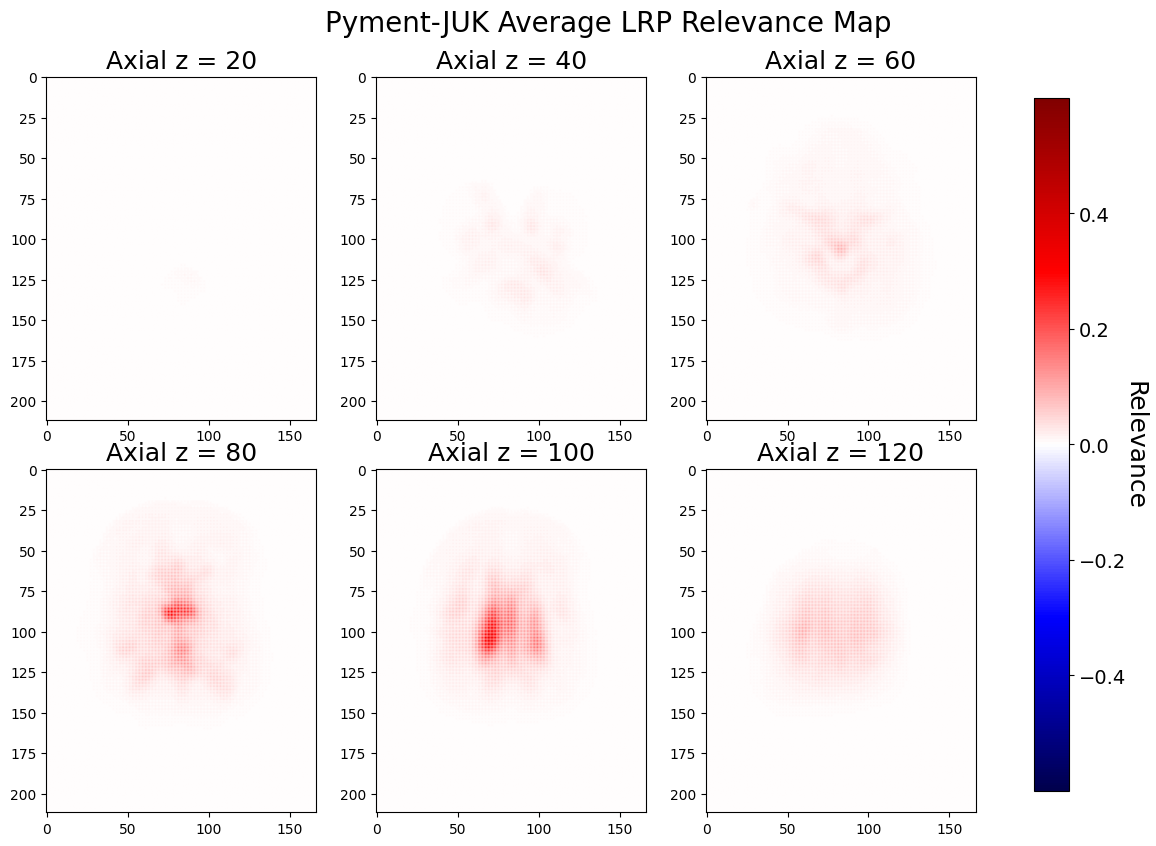

In [25]:
max_abs_value=0.77
normalized_data= data/ max_abs_value
# Cortes axiales Z = 20 → 120 cada 20
z_indices = list(range(20, 121, 20))   # [20,40,60,80,100,120]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle('Pyment-JUK Average LRP Relevance Map', fontsize=20, y=0.93)

vmax=0.6
vmin=-0.6
norm =TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

axes = axes.ravel()

for i, z in enumerate(z_indices):
    slc = np.rot90(normalized_data[:, :, z])

    # MISMO colormap que en tu código original
    im = axes[i].imshow(slc, cmap='seismic', norm=norm)
    
    axes[i].set_title(f'Axial z = {z}', fontsize=18)
    axes[i].set_aspect('equal')
    

# Ajuste de espacios
fig.subplots_adjust(wspace=0.22, hspace=0.04)

# Colorbar general
cbar = fig.colorbar(im, ax=axes.tolist(), shrink=0.9)
cbar.set_label('Relevance', rotation=270, labelpad=15, fontsize=18)
cbar.ax.tick_params(labelsize=14)

plt.show()

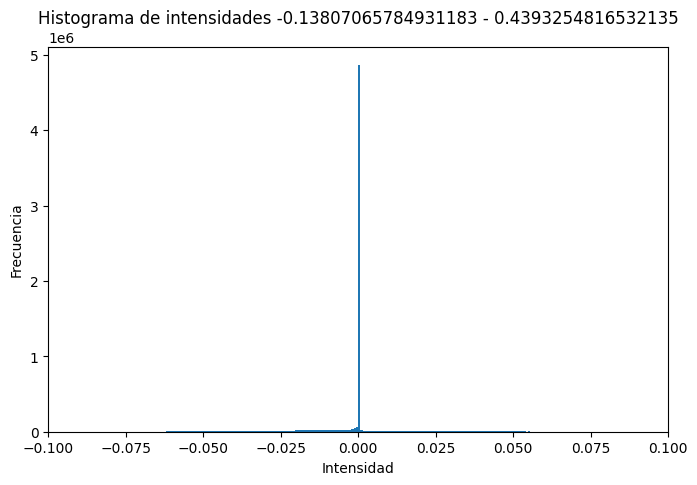

In [254]:
nii_path = "./Pyment/lrp_mean_JUK.nii.gz"
img = nib.load(nii_path)
data = img.get_fdata()
min=np.min(data)
max=np.max(data)
# Convertir el volumen 3D en un vector 1D
flat = data.flatten()


# (Opcional) Filtrar valores NaN o infinitos
flat = flat[np.isfinite(flat)]

# Graficar histograma
plt.figure(figsize=(8, 5))
plt.hist(flat, bins=1000)
plt.title(f"Histograma de intensidades {min} - {max}")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.xlim(-0.1,0.1)
plt.show()